#**Redes Convolucionales CIFRAR10**





In [ ]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Dividir un conjunto de validación
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

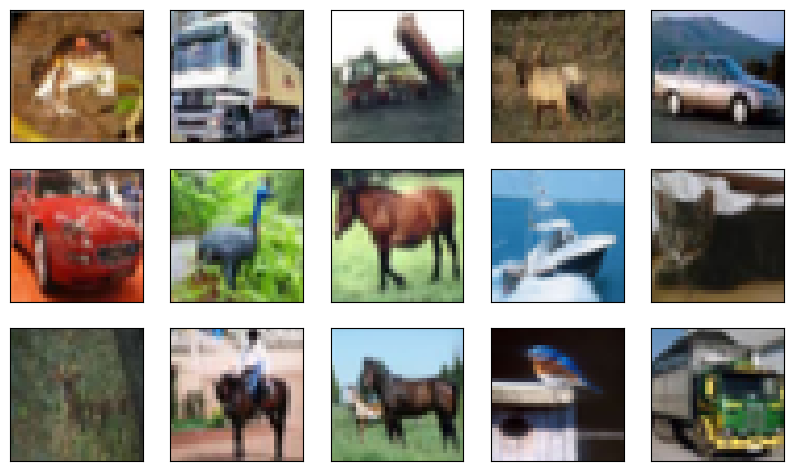

In [ ]:
# Ver algunas de las imagenes
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

## **Construccion del Modelo**

In [ ]:
# Modelo LeNet-5
model = Sequential()

# Capa 1: Convolucional
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Capa 2: Convolucional
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Capa 3: Convolucional
model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Aplanamiento
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(256, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,042 (890.79 KB)

 Trainable params: 227,594 (889.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compilar el modelo
adam = optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Configuración para guardar el mejor modelo basado en la precisión de validación
checkpointer = ModelCheckpoint(filepath="lenet_cifar10_32x32x3.keras", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

## **Entrenamiento del Modelo LeNet**

In [ ]:
# Entrenamiento del modelo
h_1 = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_val, y_val), shuffle=True, callbacks=[checkpointer])

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.3735 - loss: 1.9940
Epoch 1: val_accuracy improved from -inf to 0.33080, saving model to lenet_cifar10_32x32x3.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 216ms/step - accuracy: 0.3738 - loss: 1.9928 - val_accuracy: 0.3308 - val_loss: 2.0513
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5537 - loss: 1.2605
Epoch 2: val_accuracy improved from 0.33080 to 0.55470, saving model to lenet_cifar10_32x32x3.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.5538 - loss: 1.2604 - val_accuracy: 0.5547 - val_loss: 1.2961
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6121 - loss: 1.0934
Epoch 3: val_accuracy improved from 0.55470 to 0.64740, saving model to lenet_cifar10_32x32x3.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.6121 - loss: 1.0934 - val_accuracy: 0.6474 - val_loss: 1.0125
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6457 - loss

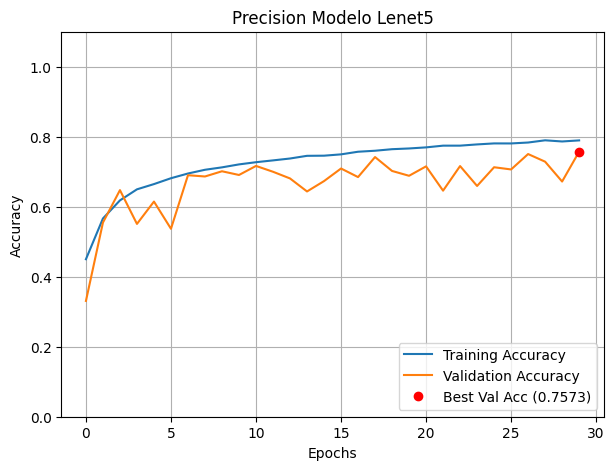

In [ ]:
# Mostrar las curvas de aprendizaje
plt.figure(figsize=(7,5))

epoch_max = np.argmax(h_1.history["val_accuracy"])

# Precision de entrenamiento y validacion
plt.plot(h_1.history["accuracy"], label="Training Accuracy")
plt.plot(h_1.history["val_accuracy"], label="Validation Accuracy")

# Mejor valor de precision de validacion
plt.plot(epoch_max, h_1.history["val_accuracy"][epoch_max], 'ro', label=f"Best Val Acc ({h_1.history['val_accuracy'][epoch_max]:.4f})")

plt.legend(loc="lower right")
plt.title("Precision Modelo Lenet5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 1.1])
plt.grid(True)

plt.show()